# PyTorch. Основы: синтаксис, torch.cuda и torch.autograd

## Задание 7.1

In [2]:
import torch
import matplotlib.pyplot as plt

### Задача 1

1). Создайте два вещественных тензора: `a` размером (3, 4) и `b` размером (12,)   
2). Создайте тензор `c`, являющийся тензором `b`, но размера (2, 2, 3)  
3). Выведите первый столбец матрицы `a` с помощью индексации

In [3]:
# Ваш код здесь
a = torch.tensor([[1.0, 2.0, 3.0, 4.0],
                  [5.0, 6.0, 7.0, 8.0],
                  [9.0, 10.0, 11.0, 12.0]])

b = torch.tensor([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0])

c = b.view(2, 2, 3)
print(a[:, 0])

tensor([1., 5., 9.])


### Задача 2

1). Создайте два вещественных тензора: `a` размером (5, 2) и `b` размером (1,10)   
2). Создайте тензор `c`, являющийся тензором `b`, но размера (5, 2)  
3). Произведите все арифметические операции с тензорами `a` и `c`

In [5]:
# Ваш код здесь

a = torch.randn(5, 2)
b = torch.randn(1, 10)
c = b.view(5, 2)

addition = a + c
subtraction = a - c
multiplication = a * c
division = a / c

addition, subtraction, multiplication, division

(tensor([[ 0.6668,  0.8680],
         [ 2.6148, -0.3822],
         [-1.3056, -0.3569],
         [-2.6081,  0.9687],
         [ 1.0754,  0.1375]]),
 tensor([[ 0.6155, -1.0884],
         [ 0.4383,  0.9691],
         [-1.8955, -0.2093],
         [ 1.4325,  1.5944],
         [ 2.5843, -1.1824]]),
 tensor([[ 0.0165, -0.1078],
         [ 1.6613, -0.1983],
         [-0.4721,  0.0209],
         [ 1.1875, -0.4009],
         [-1.3806, -0.3448]]),
 tensor([[24.9540, -0.1127],
         [ 1.4027, -0.4344],
         [-5.4262,  3.8372],
         [ 0.2910, -4.0966],
         [-2.4253, -0.7916]]))

### Задача 3

1). Создайте тензор *целых чисел* `images` размерности (100, 200, 200, 3) (можно интерпретировать это как 100 картинок размера 200х200 с тремя цветовыми каналами, то есть 100 цветных изображений 200х200). Заполните его нулями  

2). Сделайте так, чтобы у $i$-ой по порядку картинки была нарисована белая полоса толщиной два пикселя в строках, которые соответствуют номеру картинки. Например, у 3-ей по порядку картинки белая полоска будет занимать 6 и 7 строки, у 99 - 198 и 199. Сделать белую строку можно, записав в ячейки тензора число 255 (по всем трём каналам). Выведите несколько примеров с помощью `pylot`  

3). Посчитайте среднее тензора `images` по 1-ой оси (по сути - средняя картинка), умножьте полученный тензор на 70. Нарисуйте с помощью `pyplot`, должна получиться серая картинка (при взятии среднего нужно привести тензор к float с помощью `.float()`, при отрисовке обратно к int с помощью `.int()`)

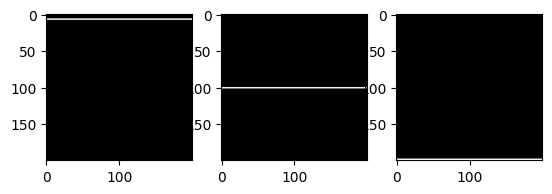

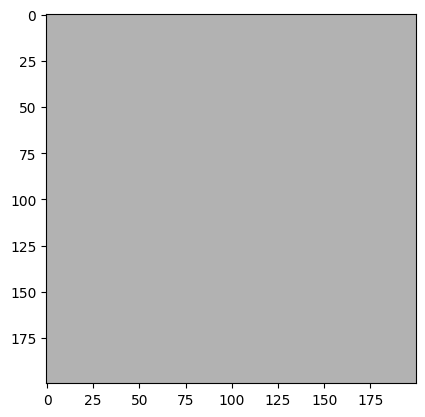

In [21]:
import torch
import matplotlib.pyplot as plt

# 1
images = torch.zeros(100, 200, 200, 3)

# 2
for i in range(100):
    images[i, i*2:i*2+2, :, :] = 255

fig, axs = plt.subplots(1, 3)
axs[0].imshow(images[3].int())
axs[1].imshow(images[50].int())
axs[2].imshow(images[99].int())
plt.show()

# 3
mean_image = images.float().mean(dim=0) * 70
plt.imshow(mean_image.int())
plt.show()


### Задача 4

- В Colab нажмите в меню сверху: `Runtime` -> `Change Runtime Type` -> `GPU`, где изначально стоит `None` (`Среда выполнение` - `Сменить среду выполнения`)
- Объявите тензор `a` размера (2, 3, 4) и тензор `b` размера (1, 8, 3) на GPU, иницилизируйте их случайно равномерно (`.uniform_()`)
- Затем измените форму тензора `b`, чтобы она совпадала с формой тензора `a`, получите тензор `c`  
- Переместите `c` на CPU, переместите `a` на CPU  
- Оберните их в `Variable()`
- Объявите тензор `L = torch.mean((c - a) `**` 2)` и посчитайте градиент `L` по `c` ( то есть $\frac{\partial{L}}{\partial{c}})$
- Выведите градиент `L` по `c`

In [3]:
# Ваш код здесь

# Объявите тензор a размера (2, 3, 4) и тензор b размера (1, 8, 3) на GPU, иницилизируйте их случайно равномерно (.uniform_())
a = torch.empty(2, 3, 4, device='cuda').uniform_()
b = torch.empty(1, 8, 3, device='cuda').uniform_()

# Затем измените форму тензора b, чтобы она совпадала с формой тензора a, получите тензор c
c = b.view(2, 3, 4)

# Переместите c на CPU, переместите a на CPU
c = c.cpu()
a = a.cpu()

# Оберните их в Variable()
a = torch.autograd.Variable(a, requires_grad=True)
c = torch.autograd.Variable(c, requires_grad=True)

# Объявите тензор L = torch.mean((c - a)**2) и посчитайте градиент L по c ( то есть  ∂L∂c)
L = torch.mean((c - a)**2)
L.backward()

# Выведите градиент L по c.
print(c.grad)

tensor([[[ 0.0015, -0.0270,  0.0011,  0.0195],
         [ 0.0235,  0.0037,  0.0325, -0.0185],
         [-0.0083, -0.0746,  0.0315, -0.0403]],

        [[-0.0753, -0.0129, -0.0284,  0.0289],
         [-0.0448,  0.0181,  0.0152,  0.0333],
         [-0.0151,  0.0139,  0.0284, -0.0196]]])
